In [32]:
# read in binary data
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import pickle
import sys, os
sys.path.append(os.environ['raco'])
from common import dotdict, g_univ, inds_from_vals
f = open("Model_S.pkl", "rb")
di = dotdict(pickle.load(f))
f.close()

In [14]:
di.msun

1.989e+33

In [15]:
# all right let's plot some density variation

In [16]:
plt.close()
plt.plot(di.rr, di.rho)
plt.xlabel('r [cm]')
plt.ylabel('density')
plt.yscale('log')
#plt.ylim(0,6)

/var/folders/ss/ddlz1pd53ls6zf26gks96rgc0000gp/T/ipykernel_27545/830389900.py:1: MatplotlibDeprecationWarning: The close_event function was deprecated in Matplotlib 3.6 and will be removed two minor releases later. Use callbacks.process('close_event', CloseEvent(...)) instead.
  plt.close()


/var/folders/ss/ddlz1pd53ls6zf26gks96rgc0000gp/T/ipykernel_27545/956094852.py:1: MatplotlibDeprecationWarning: The close_event function was deprecated in Matplotlib 3.6 and will be removed two minor releases later. Use callbacks.process('close_event', CloseEvent(...)) instead.
  plt.close()


<IPython.core.display.Javascript object>


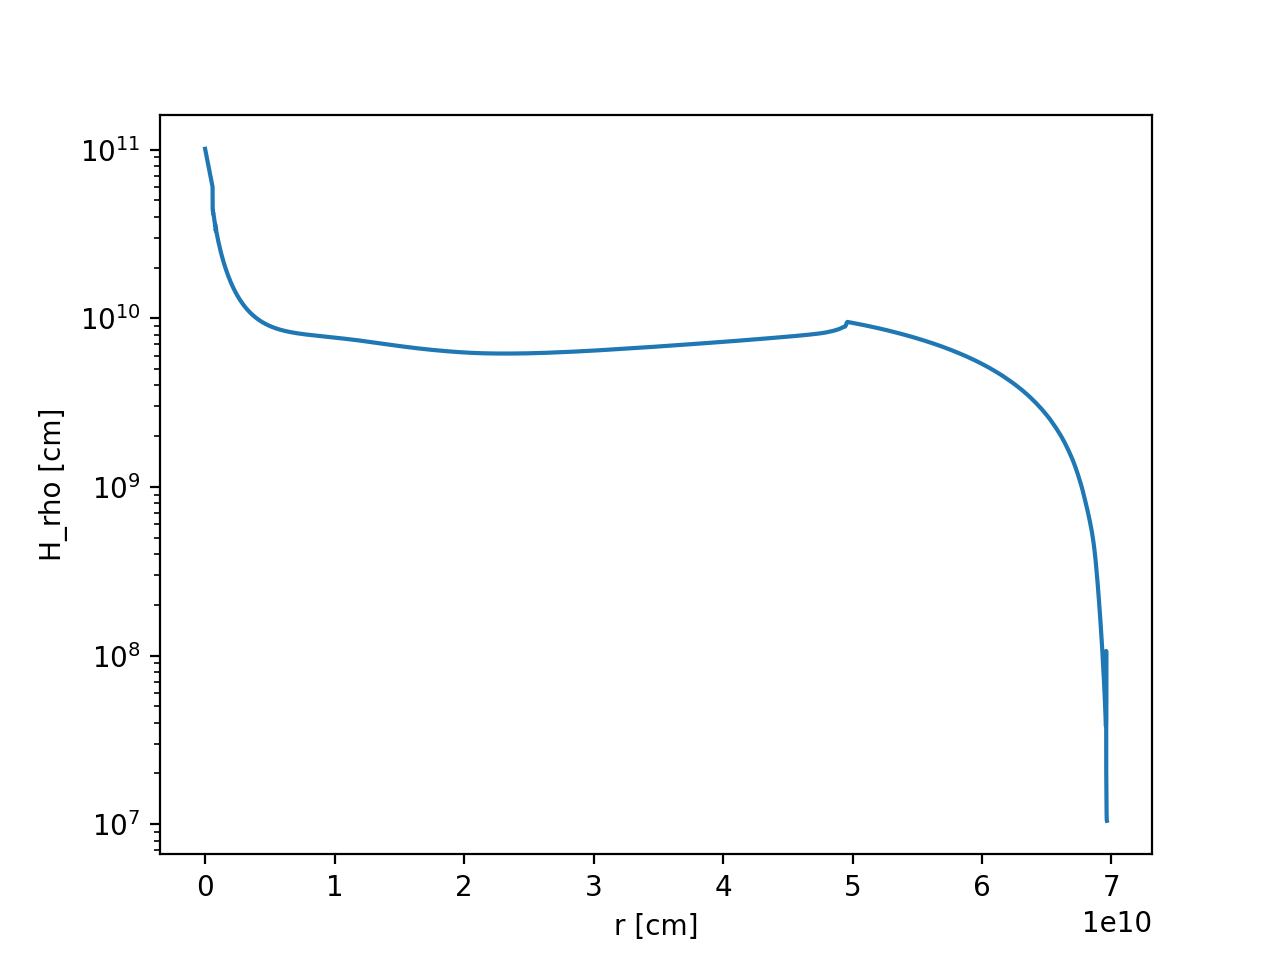

In [17]:
plt.close()
plt.plot(di.rr[1:], -1.0/di.dlnrho[1:])
plt.xlabel('r [cm]')
plt.ylabel('H_rho [cm]')
plt.yscale('log')
#plt.ylim(0,6)

/var/folders/ss/ddlz1pd53ls6zf26gks96rgc0000gp/T/ipykernel_27545/1248083478.py:2: MatplotlibDeprecationWarning: The close_event function was deprecated in Matplotlib 3.6 and will be removed two minor releases later. Use callbacks.process('close_event', CloseEvent(...)) instead.
  plt.close()


<IPython.core.display.Javascript object>


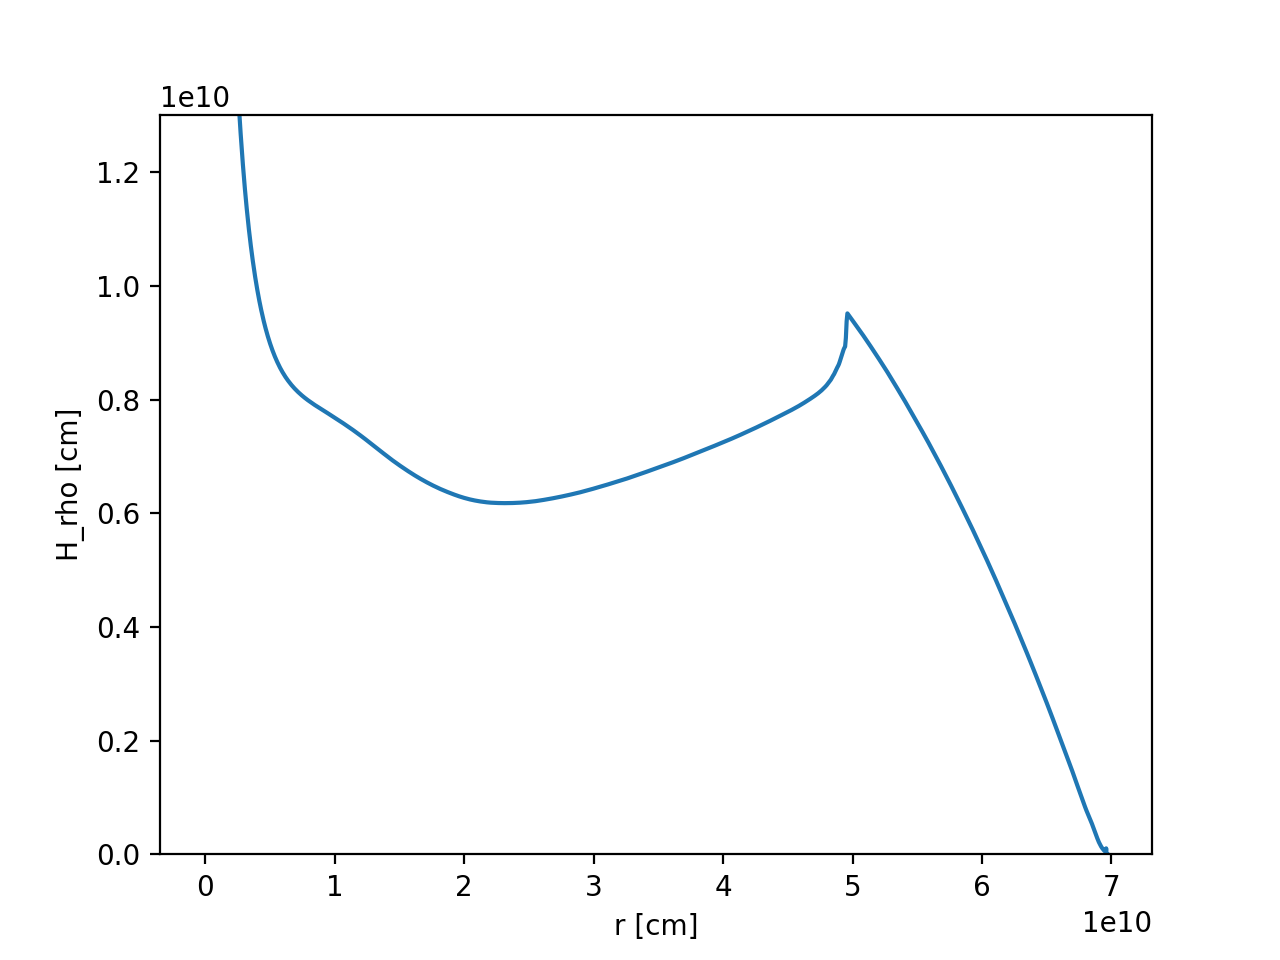

(0.0, 13000000000.0)

In [18]:
# try non-log
plt.close()
plt.plot(di.rr[1:], -1.0/di.dlnrho[1:])
plt.xlabel('r [cm]')
plt.ylabel('H_rho [cm]')
plt.ylim(0,1.3e10)

In [19]:
# it's actually more or less linear decrease in convection zone

/var/folders/ss/ddlz1pd53ls6zf26gks96rgc0000gp/T/ipykernel_27545/574768053.py:4: MatplotlibDeprecationWarning: The close_event function was deprecated in Matplotlib 3.6 and will be removed two minor releases later. Use callbacks.process('close_event', CloseEvent(...)) instead.
  plt.close()


<IPython.core.display.Javascript object>


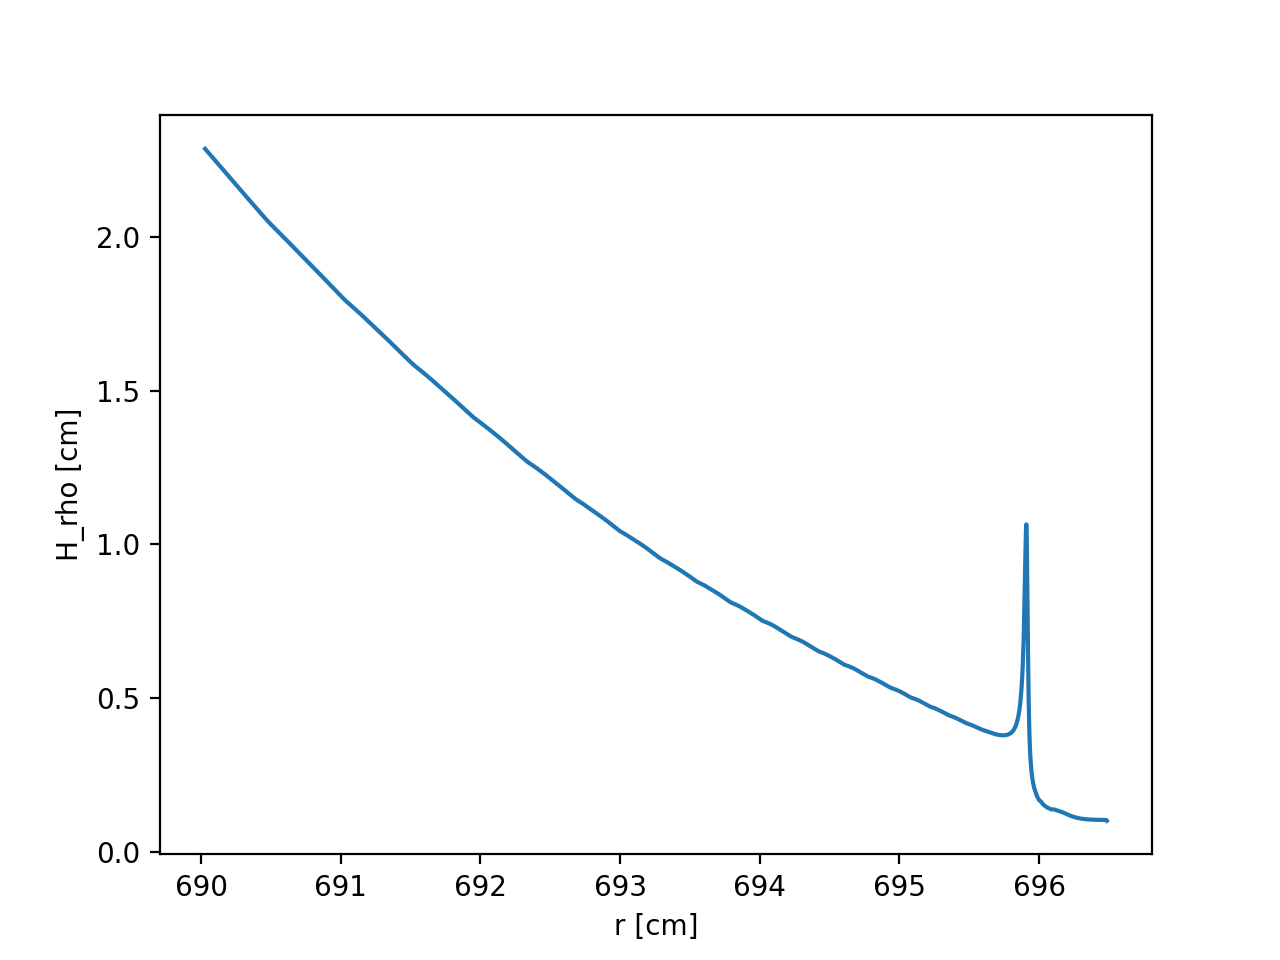

Text(0, 0.5, 'H_rho [cm]')

In [20]:
# plot top bit
rcut = 6.9e10
ircut = np.argmin(np.abs(di.rr - rcut))
plt.close()
plt.plot(di.rr[:ircut]/1e8, -1.0/di.dlnrho[:ircut]/1e8)
plt.xlabel('r [cm]')
plt.ylabel('H_rho [cm]')
#plt.yscale('log')

In [21]:
# near top of CZ, (or 1 Mm below it), local density scale height is 0.5 Mm
# 3 Mm below, it's 1 Mm

/var/folders/ss/ddlz1pd53ls6zf26gks96rgc0000gp/T/ipykernel_27545/2882464234.py:2: MatplotlibDeprecationWarning: The close_event function was deprecated in Matplotlib 3.6 and will be removed two minor releases later. Use callbacks.process('close_event', CloseEvent(...)) instead.
  plt.close()


<IPython.core.display.Javascript object>


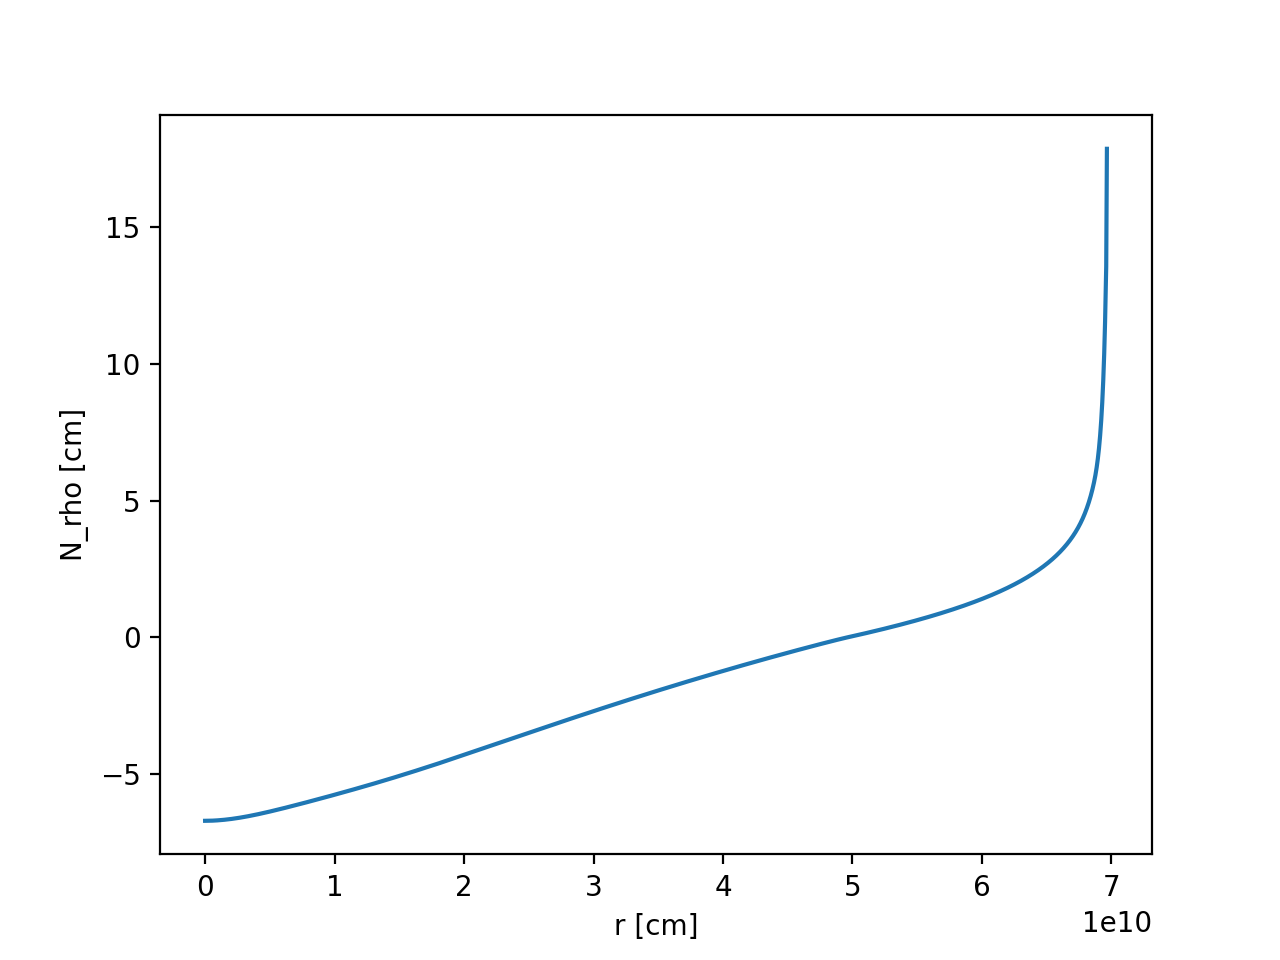

Text(0, 0.5, 'N_rho [cm]')

In [22]:
# plot number of scale heights!
plt.close()
rhobcz = di.rho[di.irbcz]

plt.plot(di.rr, np.log(rhobcz/di.rho))
plt.xlabel('r [cm]')
plt.ylabel('N_rho [cm]')
#plt.xscale('log')
#plt.ylim(0,6)

/var/folders/ss/ddlz1pd53ls6zf26gks96rgc0000gp/T/ipykernel_27545/830597154.py:5: MatplotlibDeprecationWarning: The close_event function was deprecated in Matplotlib 3.6 and will be removed two minor releases later. Use callbacks.process('close_event', CloseEvent(...)) instead.
  plt.close()


<IPython.core.display.Javascript object>


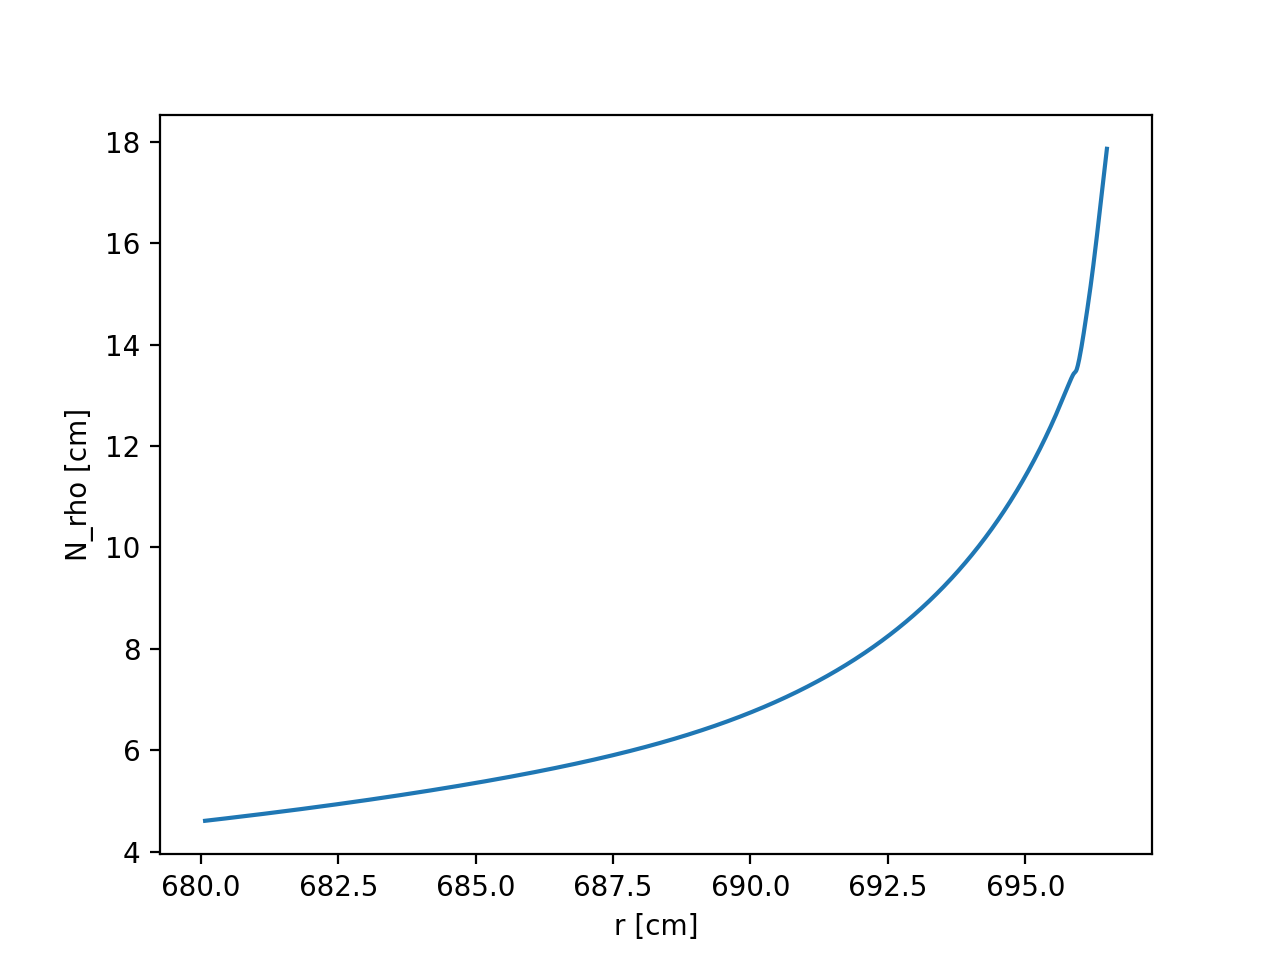

Text(0, 0.5, 'N_rho [cm]')

In [23]:
# plot number of scale heights near top
rcut = 6.8e10
ircut = np.argmin(np.abs(di.rr - rcut))

plt.close()
rhobcz = di.rho[di.irbcz]

plt.plot(di.rr[:ircut]/1e8, np.log(rhobcz/di.rho[:ircut]))
plt.xlabel('r [cm]')
plt.ylabel('N_rho [cm]')
#plt.xscale('log')
#plt.ylim(0,6)

<IPython.core.display.Javascript object>


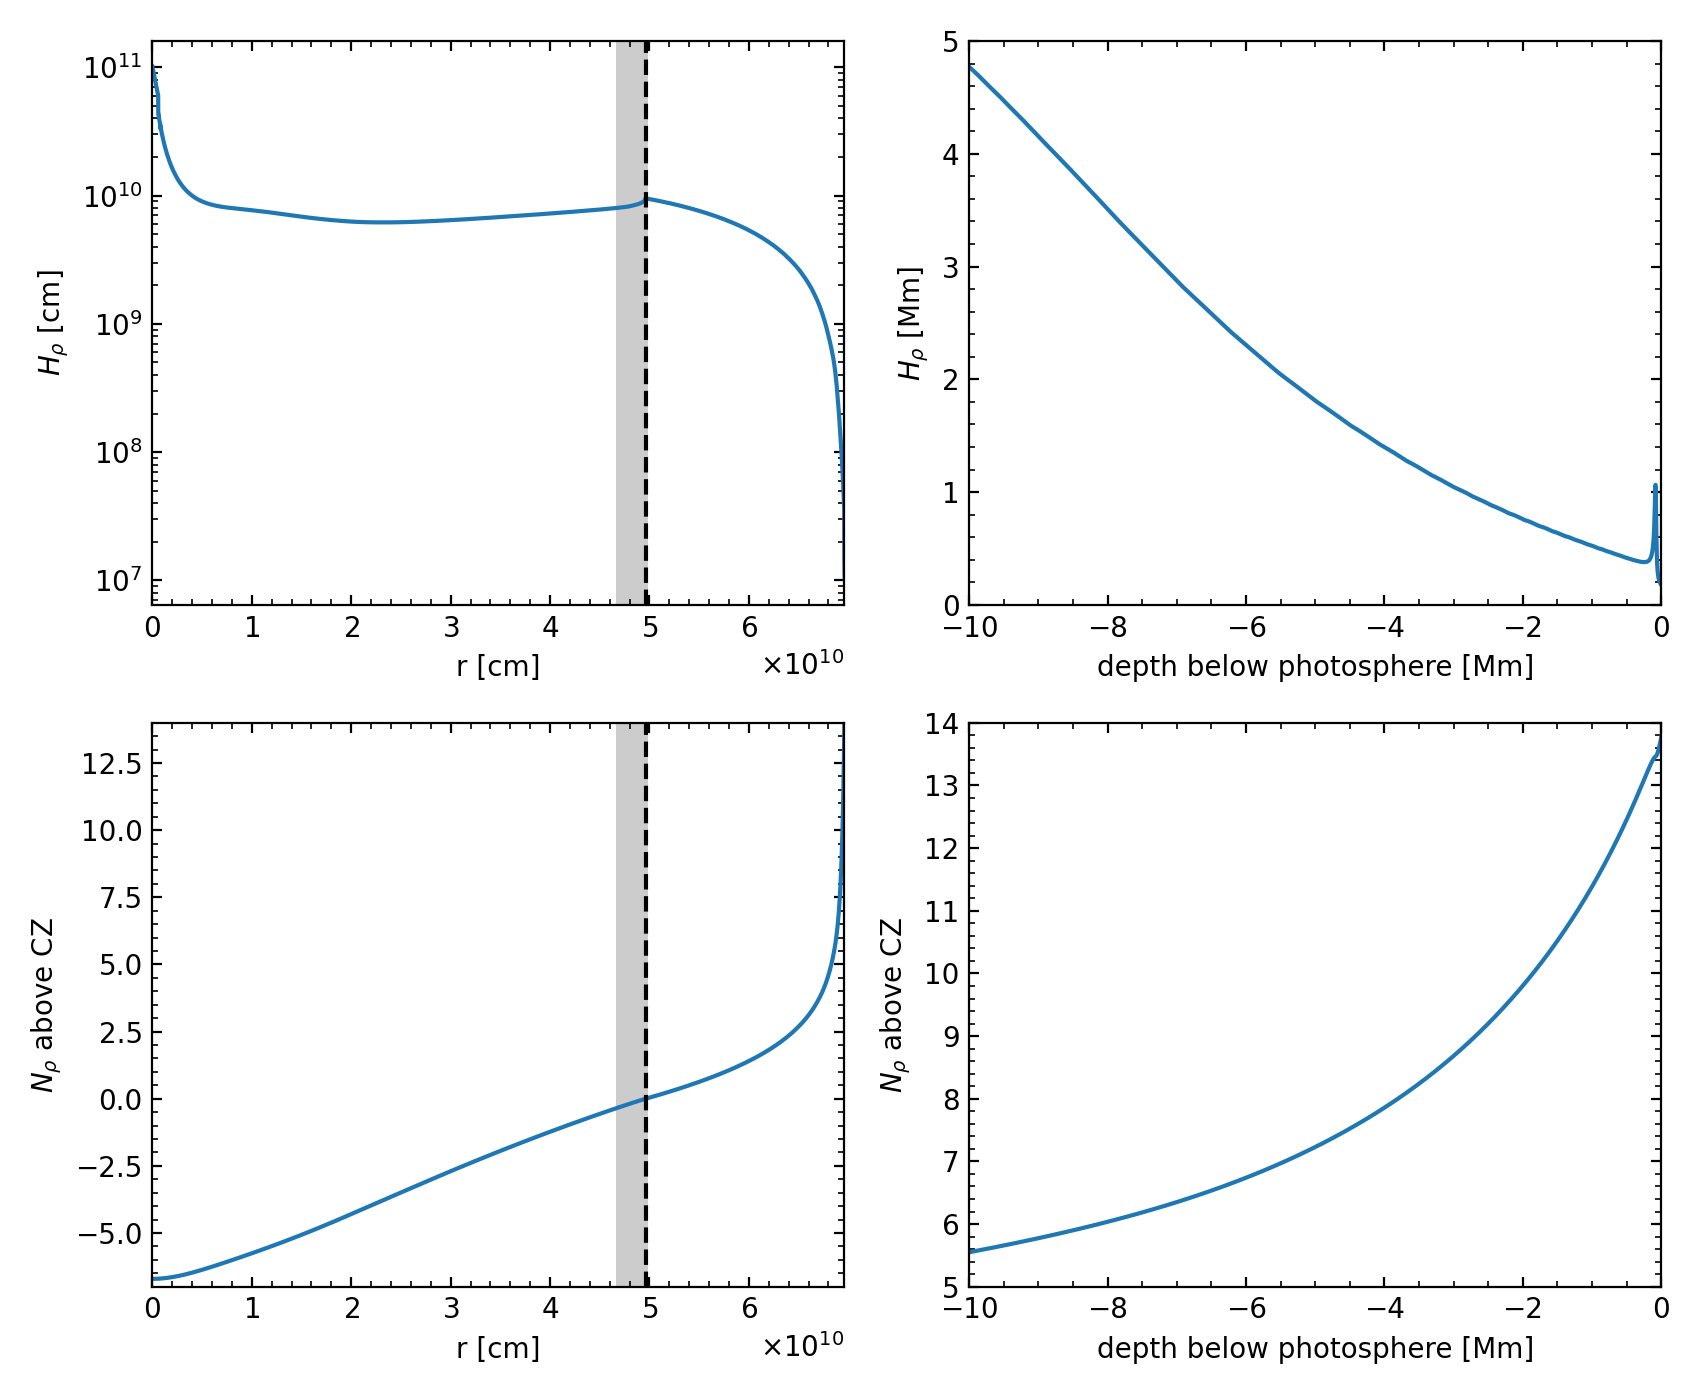

In [24]:
# let's make nice plot of diffusions and Prandtl numbers
fig, axs = plt.subplots(2, 2, figsize=(8.5, 7.))
axs = axs.flatten()
#ax1, ax2 = axs
ax1, ax2, ax3, ax4 = axs

depth_cut = -10. # plot upper five Mm for zoom-in
#rcut = di.rsun - depth_cut
rr_depth = (di.rr - di.rsun)/1e8
ircut = np.argmin(np.abs(rr_depth - depth_cut))

# plot local density scale height
ax1.plot(di.rr, -1.0/di.dlnrho)
ax1.set_xlim(0, di.rsun)
ax1.set_yscale('log')
# set limits/labels
ax1.set_xlim(0, di.rsun)
ax1.set_xlabel('r [cm]')
ax1.set_ylabel(r'$H_\rho$' + ' [cm]')

# plot local density scale height, zoom-in
ax2.plot(rr_depth[:ircut+1], -1.0/di.dlnrho[:ircut+1]/1e8)
# set limits/labels
ax2.set_xlim(depth_cut, 0.)
ax2.set_ylim(0, 5.)
ax2.set_xlabel('depth below photosphere [Mm]')
ax2.set_ylabel(r'$H_\rho$' + ' [Mm]')


# plot number of scale heights above CZ
ax3.plot(di.rr, np.log(rhobcz/di.rho))
ax3.set_xlim(0, di.rsun)
# set limits/labels
ax3.set_xlim(0, di.rsun)
ax3.set_xlabel('r [cm]')
ax3.set_ylim(-7, 14)
ax3.set_ylabel(r'$N_\rho$' + ' above CZ')

# plot local density scale height, zoom-in
ax4.plot(rr_depth[:ircut+1], np.log(rhobcz/di.rho)[:ircut+1])
# set limits/labels
ax4.set_xlim(depth_cut, 0.)
ax4.set_ylim(5, 14)
ax4.set_xlabel('depth below photosphere [Mm]')
ax4.set_ylabel(r'$N_\rho$' + ' above CZ')



# set y limits and scaling
#y1, y2 = 1e-4, 1e8
#ax1.set_ylim(y1, y2)
#ax1.set_yscale('log')
#ax1.set_ylabel('diffusivity ' + r'$\rm{[cm^2\ s^{-1}]}$')

# mark some values for the left column
for ax in [ax1, ax3]:
    npoints = 100
    y1, y2 = ax.get_ylim()
    ax.set_ylim(y1, y2)
    yvals = np.linspace(y1, y2, npoints)

    # plot base of CZ and cut radius
    ax.plot(di.rbcz + np.zeros(npoints), yvals, 'k--')


    # shade the tachocline
    ax.fill_between(di.rr[di.irtach2:di.irtach1], di.rr[di.irtach2:di.irtach1]*0 + y1,\
                     di.rr[di.irtach2:di.irtach1]*0 + y2, fc="k", alpha=0.2)

count = 1
for ax in axs:
    plt.sca(ax)
    plt.minorticks_on()

    plt.tick_params(top=True, right=True, direction='in', which='both')
    plt.tick_params(top=True, right=True, direction='in')

    if count in [1, 3]:
        plt.ticklabel_format(useMathText=True, axis='x', scilimits=(0,0)    )
        
    count += 1
    
plt.tight_layout()

plt.savefig('plots/Model_S_Hrho.png', dpi=300)

In [13]:
# get the density scale height for my typical tachocline simulation

In [34]:
rout = 6.5860209e10
r0 = 5.0e10
H = rout - r0
rin = r0 - H
irin, irout = inds_from_vals(di.rr, [rin, rout])
nrho = np.log(rhobcz/di.rho)
print (nrho[irin])
print (nrho[irout])

-2.0664283370814185
3.0463463754314533
